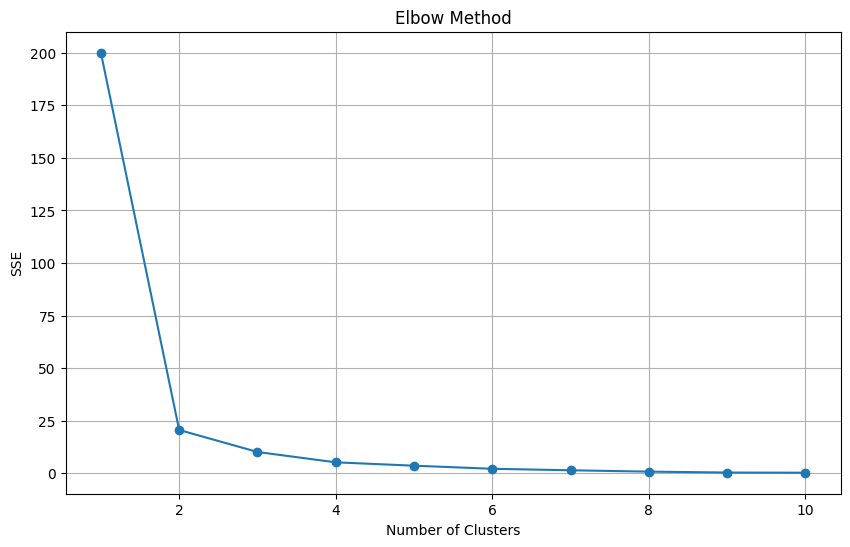

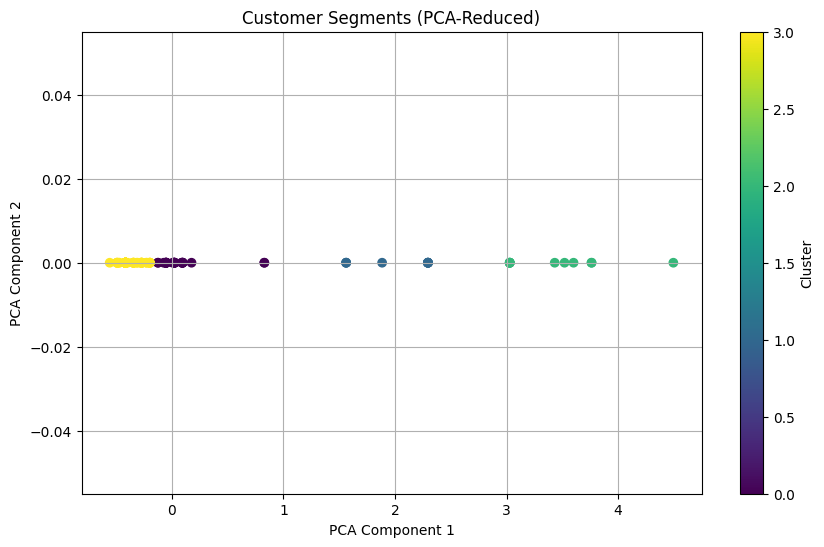

<Figure size 1200x600 with 0 Axes>

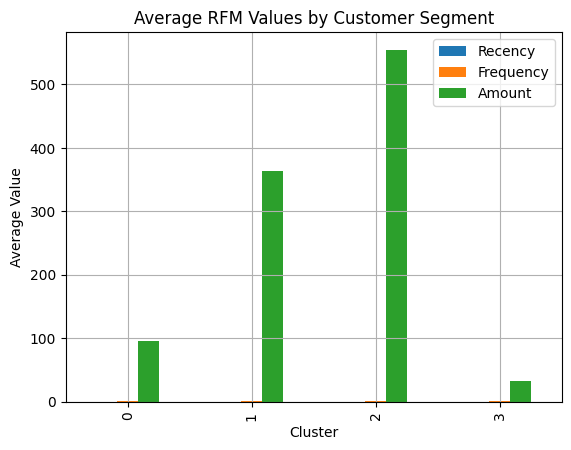

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load and preview data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Clean and preprocess data
def clean_data(df):
    df.fillna(0, inplace=True)
    return df

# Create RFM features
def create_rfm(df):
    rfm = df.groupby('CustomerID').agg({
        'CustomerID': 'count',
        'Amount': 'sum'
    }).rename(columns={'CustomerID': 'Frequency'})
    rfm['Recency'] = 0
    return rfm

# Normalize RFM features
def normalize_rfm(rfm):
    scaler = StandardScaler()
    return scaler.fit_transform(rfm)

# Elbow method for optimal clusters
def plot_elbow_method(rfm_normalized):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
        kmeans.fit(rfm_normalized)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()

# Apply K-means clustering
def apply_kmeans(rfm_normalized, rfm, k):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)
    return rfm

# Visualize clusters using PCA
def visualize_pca_clusters(rfm, rfm_normalized):
    pca = PCA(n_components=2)
    rfm_pca = pca.fit_transform(rfm_normalized)
    plt.figure(figsize=(10, 6))
    plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
    plt.title('Customer Segments (PCA-Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.colorbar(label='Cluster')
    plt.show()

# Visualize cluster characteristics
def visualize_cluster_characteristics(rfm):
    cluster_summary = rfm.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Amount': 'mean'
    }).reset_index()
    plt.figure(figsize=(12, 6))
    cluster_summary.plot(kind='bar', x='Cluster', stacked=False)
    plt.title('Average RFM Values by Customer Segment')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.show()

# Main function
def main():
    df = load_data('/content/Mall_Customers.csv')
    df_clean = clean_data(df)
    rfm = create_rfm(df_clean)
    rfm_normalized = normalize_rfm(rfm)
    plot_elbow_method(rfm_normalized)
    rfm_clustered = apply_kmeans(rfm_normalized, rfm, k=4)
    visualize_pca_clusters(rfm_clustered, rfm_normalized)
    visualize_cluster_characteristics(rfm_clustered)

# Execute the script
if __name__ == "__main__":
    main()
